In [3]:
# Importamos Numpy, TensorFlow, TFLearn, y MNIST data
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:
# Recuperar los datos de entrenamiento y prueba.
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


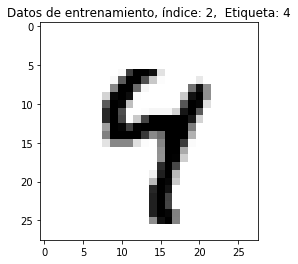

In [8]:
# Visualizando los datos
import matplotlib.pyplot as plt
%matplotlib inline

# Función para mostrar una imagen de entrenamiento por su índice en el conjunto MNIST
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    # Cambiar la forma de la matriz 784 en una imagen de 28x28
    image = trainX[index].reshape([28,28])
    plt.title('Datos de entrenamiento, índice: %d,  Etiqueta: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Mostrar la primera imagen de entrenamiento (índice 2)
show_digit(2)

In [9]:
# Definir la red neuronal.
def build_model():
    # Esto restablece todos los parámetros y variables, deje esto aquí
    tf.reset_default_graph()
    
    # Incluya la capa de entrada, las capas ocultas y establezca cómo desea entrenar el modelo
    # Entradas
    net = tflearn.input_data([None, trainX.shape[1]])
    
    # Capa(s) oculta(s)
    net = tflearn.fully_connected(net, 128, activation='ReLU')
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    
    # Capa de salida y modelo de entrenamiento.
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model

In [10]:
# Construir el modelo
model = build_model()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [11]:
# Entrenando
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=20)

Training Step: 9899  | total loss: 0.28685 | time: 3.807s
| SGD | epoch: 020 | loss: 0.28685 - acc: 0.9168 -- iter: 49400/49500
Training Step: 9900  | total loss: 0.28945 | time: 4.837s
| SGD | epoch: 020 | loss: 0.28945 - acc: 0.9151 | val_loss: 0.29994 - val_acc: 0.9162 -- iter: 49500/49500
--


In [12]:
# Compare las etiquetas que nuestro modelo predice con las etiquetas reales

# Encuentra los índices de la predicción más confiada para cada elemento. Eso nos dice el dígito predicho para esa muestra.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calcule la precisión, que es el porcentaje de veces que las etiquetas predicadas coincidieron con las etiquetas reales
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Imprime el resultado
print("Exactitud de la prueba: ", test_accuracy)

Exactitud de la prueba:  0.9121
